#  Linear Regression Model 만들기(GPU)
* Coefficient: a = 2
* Bias/Intercept : b = 1
* Equation: y = 2x + 1

In [1]:
import numpy as np

## 1. Simple 데이터셋 만들기

In [2]:
x_values = [i for i in range(11)]
print("x_values: ", x_values)

# numpy로 변환
x_train = np.array(x_values, dtype=np.float32)
print("x_train(numpy) shape :", x_train.shape)

# 중요: 2차원으로 변환
x_train = x_train.reshape(-1, 1)
print("x_train(reshape) shape :", x_train.shape)

x_values:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
x_train(numpy) shape : (11,)
x_train(reshape) shape : (11, 1)


* y = 2x + 1 만들기

In [3]:
y_values = [2*i + 1 for i in x_values]

print("y_values: ", y_values)

y_values:  [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]


In [4]:
y_values = []
for i in x_values:
    result = 2*i + 1
    y_values.append(result)
    
print("y_values: ", y_values)

y_values:  [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]


In [5]:
y_train = np.array(y_values, dtype=np.float32)
y_train.shape

(11,)

In [6]:
y_train = y_train.reshape(-1, 1)
y_train.shape

(11, 1)

# 2. Linear Regression 모델 만들기
* Linear Model
    * True Equation: y = 2x + 1
* Forward
    * Example
        * input x = 1
        * output : hat{y} = ?

In [7]:
import torch
import torch.nn as nn
from torch.autograd import Variable

### Step1. Create Model Class

In [8]:
# Create Class
class LinearRegressionModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        out = self.linear(x)
        return out

* input : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
* output : [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

### Step2. Instantiate Model Class

In [9]:
input_dim = 1
output_dim = 1

model = LinearRegressionModel(input_dim, output_dim)

In [10]:
#######################
#  USE GPU FOR MODEL  #
#######################

model.cuda()

### Step3. instantiate Loss Class
* MSE(Mean Squared Error) Loss 사용<br>
<img src="https://user-images.githubusercontent.com/60699771/85705712-7221b380-b71c-11ea-9d60-ef1cb2cd4e1e.png" align=left>

In [11]:
criterion = nn.MSELoss()

### Step4. instantiate Optimizer Class
<img src="https://user-images.githubusercontent.com/60699771/85705722-751ca400-b71c-11ea-8977-8e92cc53c36d.png" align=left>

In [12]:
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

### Step5. Train Model
* 1 epoch : going through the whole x_train data once
    * 100 epochs : 100 x mapping x)train = [0, 1, 2, 3, ,4, 5, 6, 7 ,8 ,9, 10]
    
* process
    1. Convert inputs/labels to variables
    2. Clear gradient buffets
    3. Get output given inputs
    4. Get loss
    5. Get gradients w.r.t parameters
    6. Update parameters using gradients
        * parameters = parameters - lr * parameters_gradients
    7. Repeat

In [13]:
epochs = 100

In [14]:
for epoch in range(epochs):
    epoch += 1
    # convert numpy array to torch Variable
    inputs = Variable(torch.from_numpy(x_train))
    labels = Variable(torch.from_numpy(y_train))
    
    #######################
    #  USE GPU FOR MODEL  #
    #######################
    if torch.cuda.is_available():
        inputs = Variable(torch.from_numpy(x_train).cuda())
        
    #######################
    #  USE GPU FOR MODEL  #
    #######################
    if torch.cuda.is_available():
        labels = Variable(torch.from_numpy(y_train).cuda())
    
    # clear gradients w.r.t. parameters
    optimizer.zero_grad()
    
    #Forward to get ouput
    outputs = model.forward(inputs)
    
    # Calculate Loss
    loss = criterion(outputs, labels)
    
    # Getting gradients w.r.t. parameters
    loss.backward()
    
    # Updating parameters
    optimizer.step()
    
    print('epoch {}, loss {}'.format(epoch, loss.data))

epoch 1, loss 140.24684143066406
epoch 2, loss 11.481297492980957
epoch 3, loss 0.9778289198875427
epoch 4, loss 0.12063323706388474
epoch 5, loss 0.05025792494416237
epoch 6, loss 0.04406631365418434
epoch 7, loss 0.043114956468343735
epoch 8, loss 0.042596038430929184
epoch 9, loss 0.042117271572351456
epoch 10, loss 0.04164678230881691
epoch 11, loss 0.04118170589208603
epoch 12, loss 0.04072171822190285
epoch 13, loss 0.04026711359620094
epoch 14, loss 0.039817456156015396
epoch 15, loss 0.03937269002199173
epoch 16, loss 0.03893311321735382
epoch 17, loss 0.03849842771887779
epoch 18, loss 0.03806844353675842
epoch 19, loss 0.037643227726221085
epoch 20, loss 0.03722298517823219
epoch 21, loss 0.03680722042918205
epoch 22, loss 0.036396268755197525
epoch 23, loss 0.035989902913570404
epoch 24, loss 0.035587914288043976
epoch 25, loss 0.03519053757190704
epoch 26, loss 0.03479751572012901
epoch 27, loss 0.03440901264548302
epoch 28, loss 0.03402474895119667
epoch 29, loss 0.0336447

### Compare Data

In [15]:
predicted = model.forward(Variable(torch.from_numpy(x_train))).data.numpy()
predicted

array([[ 0.7709731],
       [ 2.803955 ],
       [ 4.836937 ],
       [ 6.869919 ],
       [ 8.902901 ],
       [10.935883 ],
       [12.968864 ],
       [15.001846 ],
       [17.034828 ],
       [19.06781  ],
       [21.100792 ]], dtype=float32)

In [16]:
y_train

array([[ 1.],
       [ 3.],
       [ 5.],
       [ 7.],
       [ 9.],
       [11.],
       [13.],
       [15.],
       [17.],
       [19.],
       [21.]], dtype=float32)

## 3. Plot Graph로 확인해보기

In [17]:
import matplotlib.pyplot as plt

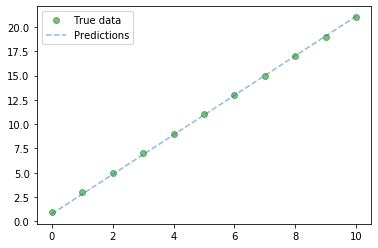

In [18]:
# Clear figure
plt.clf()

# Get Predictions
predicted = model(torch.from_numpy(x_train)).data.numpy()

# Plot true data
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)

# Legend and plot
plt.legend(loc='best')
plt.show()

## 4. Save Model

In [19]:
save_model = True
if save_model is True:
    # Saves only parameters (alpha and beta)
    torch.save(model.state_dict(), 'awesome_model.pkl')

## 5. Load Model

In [20]:
load_model = True
if load_model is True:
    model.load_state_dict(torch.load('awesome_model.pkl'))